<a href="https://colab.research.google.com/github/dindahanifa/analisis_pengujian/blob/main/job_sheet_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Langkah 1: Impor dan Cek Data**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Baca dataset
df = pd.read_csv("penjualan_toko.csv")

In [8]:
# Tampilkan 5 baris pertama
df.head()

,Tanggal,Cabang,Produk,Jumlah_Terjual,Harga_Satuan,Metode_Pembayaran,Kepuasan_Pelanggan,Diskon,Pendapatan
0,1/1/2025,Medan,Laptop,1.0,7500000.0,Transfer,4.0,0.0,7500000.0
1,1/2/2025,Jakarta,Kulkas,1.0,9000000.0,Transfer,1.0,0.0,9000000.0
2,1/2/2025,Surabaya,Kulkas,4.0,3200000.0,Tunai,5.0,5.0,12160000.0
3,1/3/2025,Surabaya,AC,5.0,2500000.0,Transfer,2.0,20.0,10000000.0
4,1/4/2025,Medan,AC,1.0,4500000.0,Kartu Kredit,1.0,10.0,4050000.0


In [9]:
df.info()

# Fill missing values with 0 for numerical columns
df['Jumlah_Terjual'] = df['Jumlah_Terjual'].fillna(0)
df['Harga_Satuan'] = df['Harga_Satuan'].fillna(0)
df['Pendapatan'] = df['Pendapatan'].fillna(0)

# Drop rows with missing values in specified columns
df.dropna(subset=['Tanggal', 'Cabang', 'Produk', 'Metode_Pembayaran', 'Kepuasan_Pelanggan', 'Diskon'], inplace=True)


# Convert specified columns to integer type
df['Jumlah_Terjual'] = df['Jumlah_Terjual'].astype(int)
df['Harga_Satuan'] = df['Harga_Satuan'].astype(int)
df['Pendapatan'] = df['Pendapatan'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tanggal             200 non-null    object 
 1   Cabang              200 non-null    object 
 2   Produk              200 non-null    object 
 3   Jumlah_Terjual      200 non-null    float64
 4   Harga_Satuan        200 non-null    float64
 5   Metode_Pembayaran   200 non-null    object 
 6   Kepuasan_Pelanggan  200 non-null    float64
 7   Diskon              200 non-null    float64
 8   Pendapatan          200 non-null    float64
dtypes: float64(5), object(4)
memory usage: 14.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tanggal             200 non-null    object 
 1   Cabang              200 non-null    object 
 2   Prod

**Langkah 2: Statistik Deskriptif**

In [10]:
# Statistik ringkas data numerik
df.isnull().sum()

,0
Tanggal,0
Cabang,0
Produk,0
Jumlah_Terjual,0
Harga_Satuan,0
Metode_Pembayaran,0
Kepuasan_Pelanggan,0
Diskon,0
Pendapatan,0


In [11]:
# Statistik data kategorikal

pd.options.display.float_format = '{:.0f}'.format
pd.options.display.precision = None

df.describe()

,Jumlah_Terjual,Harga_Satuan,Kepuasan_Pelanggan,Diskon,Pendapatan
count,200,200,200,200,200
mean,5,5537000,3,10,23200650
std,3,2370788,1,7,16853555
min,1,2500000,1,0,2250000
25%,3,3200000,2,5,11306250
50%,5,5250000,3,10,18520000
75%,7,7500000,4,15,29943750
max,9,9000000,5,20,81000000


In [12]:
# Distribusi cabang dan metode pembayaran
df.describe(include='object')

,Tanggal,Cabang,Produk,Metode_Pembayaran
count,200,200,200,200
unique,120,4,5,3
top,7/9/2025,Medan,Laptop,Tunai
freq,8,66,48,69


**Langkah 3: Eksplorasi Data Kategorikal**

In [13]:
print(df['Cabang'].value_counts())

Cabang
Medan       66
Jakarta     47
Surabaya    44
Bandung     43
Name: count, dtype: int64


In [14]:
print(df['Metode_Pembayaran'].value_counts())

Metode_Pembayaran
Tunai           69
Transfer        67
Kartu Kredit    64
Name: count, dtype: int64


In [29]:
print(df['Produk'].value_counts())

Produk
Laptop    48
AC        45
Kulkas    40
TV        37
HP        30
Name: count, dtype: int64


**Langkah 4: Analisis Korelasi**

<Axes: >

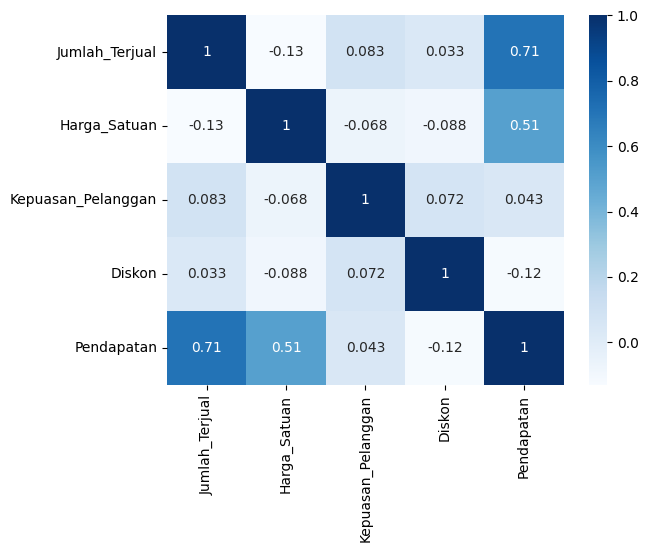

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

Korelasi antara Jumlah_Terjual dan Pendapatan adalah: 0.71


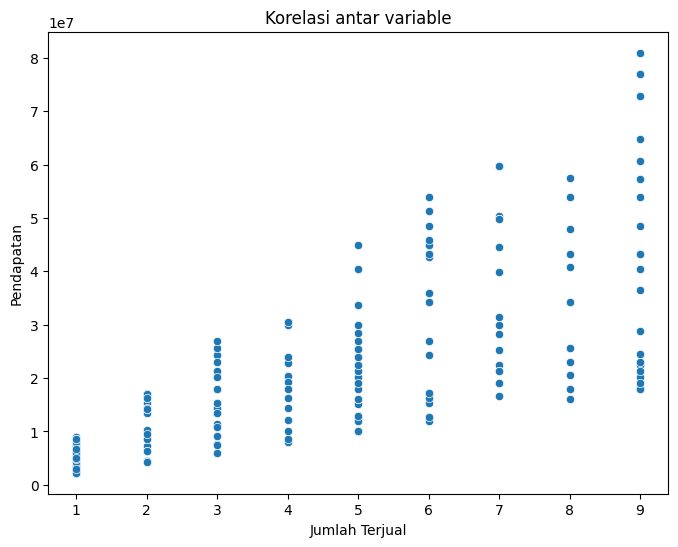

In [16]:
correlation = df['Jumlah_Terjual'].corr(df['Pendapatan'])
print(f"Korelasi antara Jumlah_Terjual dan Pendapatan adalah: {correlation:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Jumlah_Terjual', y='Pendapatan', data=df)
plt.title('Korelasi antar variable')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Pendapatan')
plt.show()

**Langkah 5: Visualisasi Data**

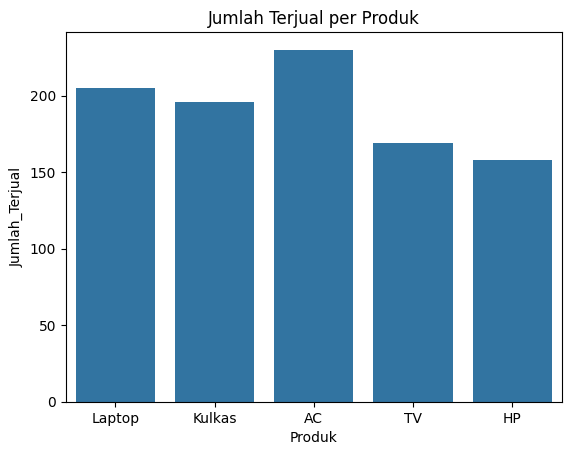

In [17]:
import seaborn as sns
sns.barplot(x='Produk', y='Jumlah_Terjual', data=df, estimator=sum, errorbar=None)
plt.title("Jumlah Terjual per Produk")
plt.show()

2. Rata-rata Pendapatan per Cabang

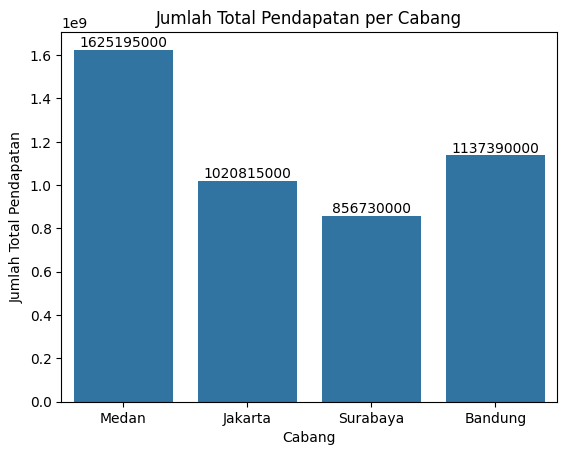

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(x='Cabang', y='Pendapatan', data=df, estimator=sum, errorbar=None)
plt.title("Jumlah Total Pendapatan per Cabang")
plt.xlabel("Cabang")
plt.ylabel("Jumlah Total Pendapatan")

# Add annotations manually
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

3. Kepuasan Pelanggan per Metode Pembayaran

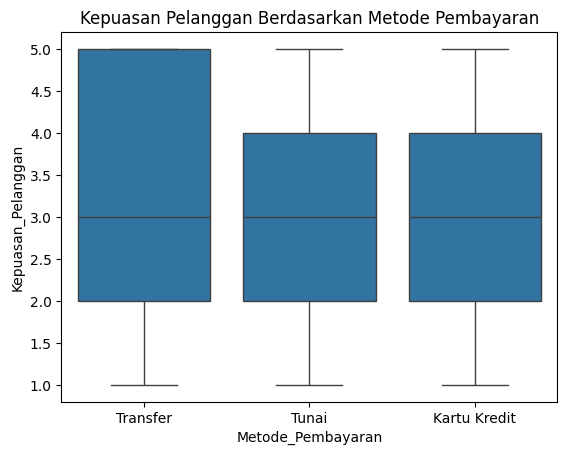

In [22]:
sns.boxplot(x='Metode_Pembayaran', y='Kepuasan_Pelanggan', data=df)
plt.title("Kepuasan Pelanggan Berdasarkan Metode Pembayaran")
plt.show()

**Langkah 6: Insight Awal**

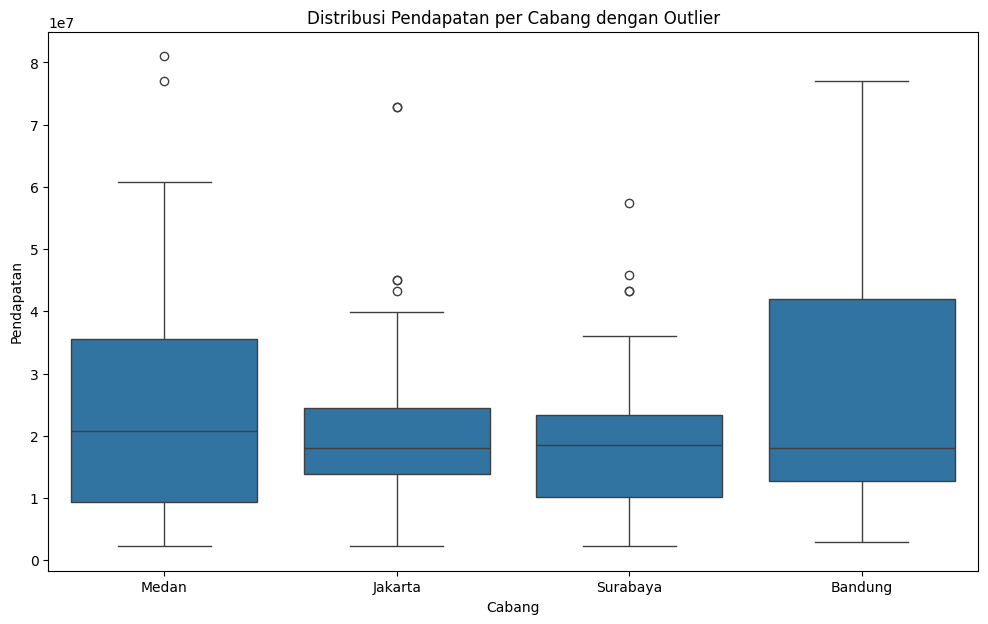

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Cabang', y='Pendapatan', data=df)
plt.title('Distribusi Pendapatan per Cabang dengan Outlier')
plt.xlabel('Cabang')
plt.ylabel('Pendapatan')
plt.show()

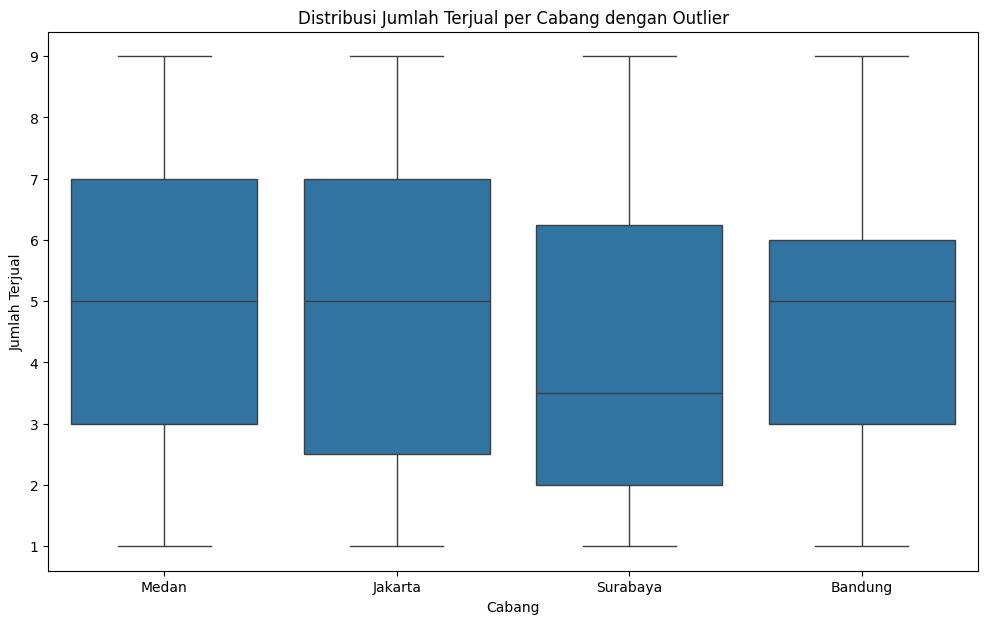

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Cabang', y='Jumlah_Terjual', data=df)
plt.title('Distribusi Jumlah Terjual per Cabang dengan Outlier')
plt.xlabel('Cabang')
plt.ylabel('Jumlah Terjual')
plt.show()

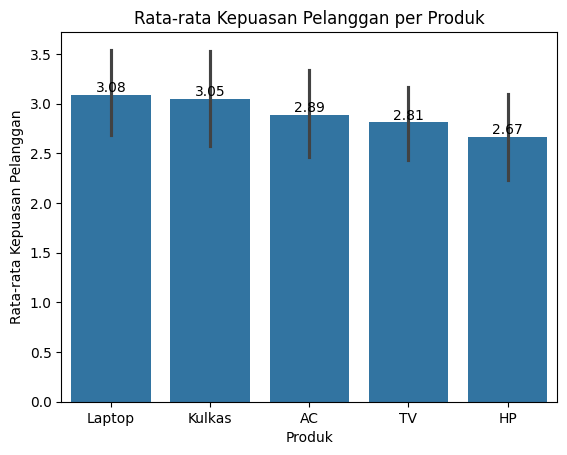

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(x='Produk', y='Kepuasan_Pelanggan', data=df, estimator='mean')
plt.title('Rata-rata Kepuasan Pelanggan per Produk')
plt.xlabel('Produk')
plt.ylabel('Rata-rata Kepuasan Pelanggan')

# Add annotations manually
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') # Use %.2f for float values

plt.show()

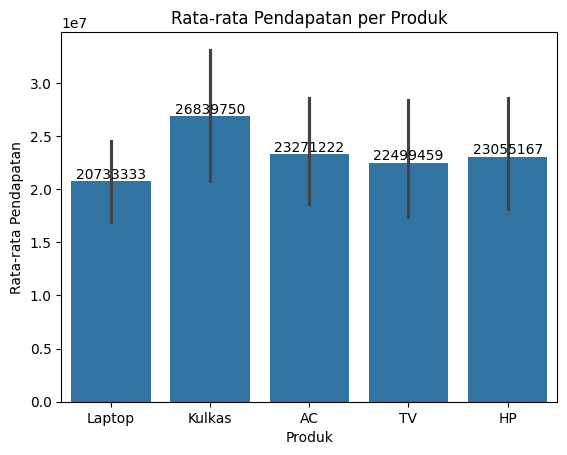

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(x='Produk', y='Pendapatan', data=df, estimator='mean')
plt.title('Rata-rata Pendapatan per Produk')
plt.xlabel('Produk')
plt.ylabel('Rata-rata Pendapatan')

# Add annotations manually
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f') # Use %.0f for integer values

plt.show()

1. **Distribusi Penjualan per Produk**: Produk 'AC'
memiliki jumlah terjual terbanyak dibandingkan produk lainnya.

2. **Pendapatan per Cabang**: Cabang 'Medan' memiliki rata-rata pendapatan yang paling tinggi di antara cabang lainnya.

3. **Korelasi Jumlah Terjual dan Pendapatan**: Terdapat korelasi positif yang kuat (sekitar 0.71) antara jumlah produk yang terjual dan pendapatan, yang berarti semakin banyak produk terjual, pendapatan cenderung meningkat. Scatter plot juga mendukung temuan ini.

4. **Kepuasan Pelanggan dan Metode Pembayaran**: Dari box plot, terlihat bahwa kepuasan pelanggan cukup bervariasi di setiap metode pembayaran, namun belum ada pola yang sangat jelas menunjukkan satu metode pembayaran secara signifikan menghasilkan kepuasan pelanggan yang lebih tinggi atau lebih rendah dibandingkan yang lain.

5. **Data yang Hilang**: Terdapat beberapa nilai yang hilang pada kolom 'Tanggal', 'Cabang', 'Produk', 'Metode_Pembayaran', 'Kepuasan_Pelanggan', dan 'Diskon'. Meskipun kita sudah mengisi nilai yang hilang pada kolom numerik, penting untuk mempertimbangkan bagaimana menangani nilai yang hilang di kolom kategorikal untuk analisis lebih lanjut.